# Creating Synthetic dataset

https://towardsdatascience.com/time-series-analysis-creating-synthetic-datasets-cf008208e014

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

%matplotlib inline

In [2]:
def plot_time_series(time, values, label, mark_days=True, hide_xticks=False, only_day=False):
    plt.figure(figsize=(10,6))
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Flows per sec (f/s)", fontsize=20)
    
    days = int(len(time)/288)
    if hide_xticks:
        plt.tick_params(
            axis='x',
            which='both',
            bottom=False,
            top=False,
            labelbottom=False
        )
    elif only_day:
        slots_hour=np.array(range(0,24)) * 12
        ticks = ["00:00", "01:00", "02:00","03:00", "04:00","05:00","06:00","07:00","08:00","09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]
        plt.xticks(slots_hour, labels=ticks, rotation=90)
    else:
        slots_days = np.array(range(0,days)) * 288
        labels = np.array(range(0,days)) + 1
        plt.xticks(slots_days, labels=labels, rotation=90)
    
    if mark_days:
        for day in range(0, days):
            plt.axvline(x=day*287, color='b', label=f'day {day}', linestyle='dashed')
    
    plt.title(label, fontsize=20)
    plt.grid(True)
    #plt.legend()

## Trend time series

In [3]:
# Time slots 5 minutes
day = (60/5)*24
month = 30*day
year = 12*month

print(f"[5min] Slots in a day: {day}")
print(f"[5min] Slots in a month: {month}")
print(f"[5min] Slots in a year: {year}")

in] Slots in a day: 288.0
in] Slots in a month: 8640.0
in] Slots in a year: 103680.0


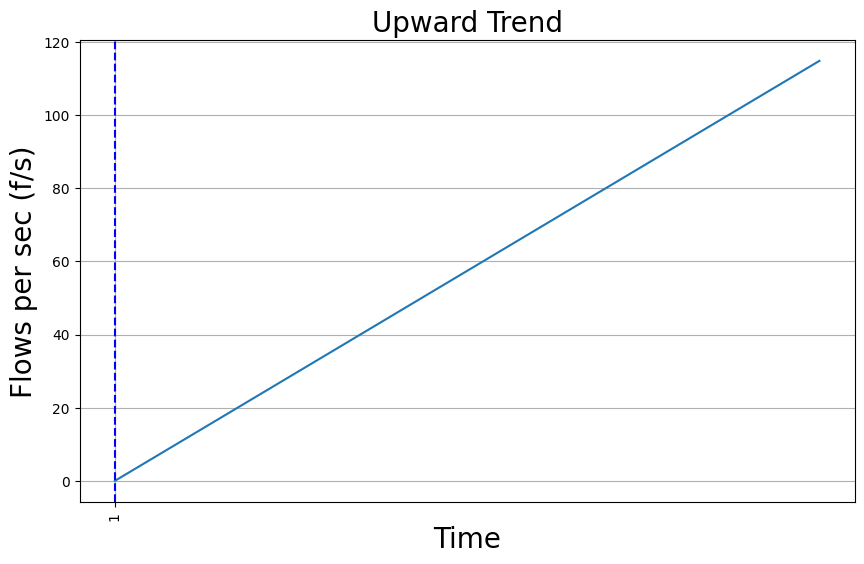

In [4]:
# Example trend
time = np.arange(day)
values = time*0.4

plot_time_series(time, values, "Upward Trend")

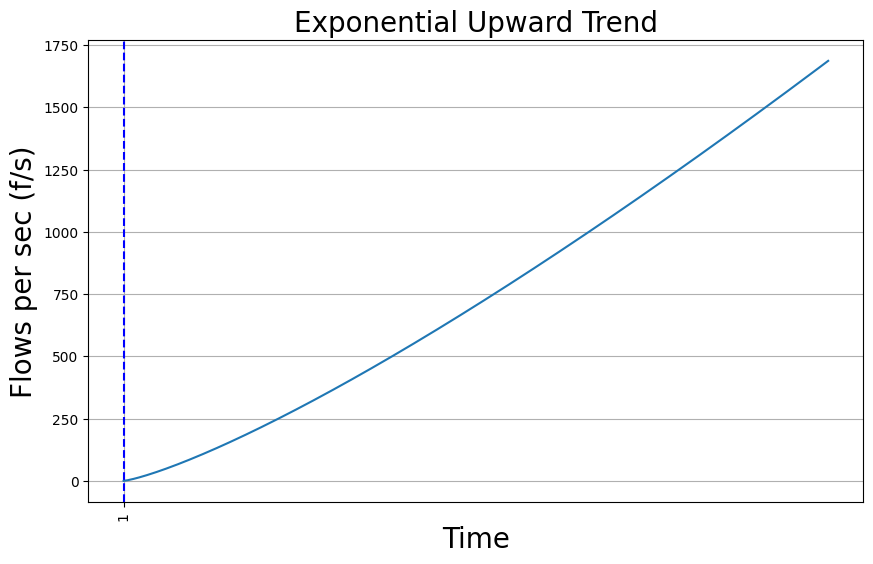

In [58]:
# Exponential upward trend
CAGR = 0.26
N = 1

time = np.arange(365)
values = time **(np.power((1+CAGR), N))
#values = time **(np.power((1+CAGR),N))

plot_time_series(time, values, "Exponential Upward Trend")

## Add seasonality

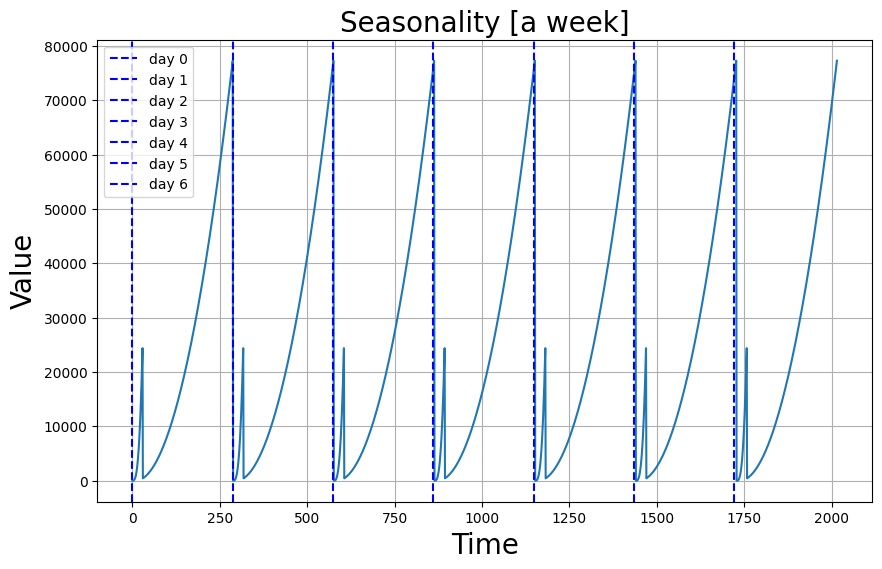

In [56]:
# Just a random pattern
time = np.arange(day)
values = np.where(time < 30, time**3, (time-9)**2)

# Repeat the pattern 7 times [a week]
seasonal = []
for i in range(7):
    for j in range(int(day)):
        seasonal.append(values[j])
        
# Plot
time_seasonal = np.arange(day*7)
plot_time_series(time_seasonal, seasonal, label="Seasonality [a week]")

## Random Noise

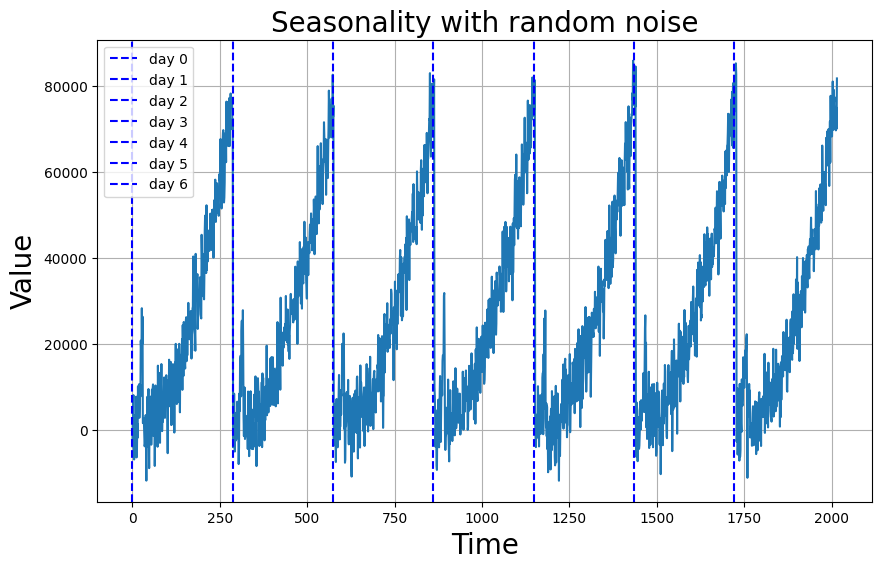

In [65]:
noise = np.random.randn(int(day*7))*5000
seasonal += noise

time_seasonal = np.arange(day*7)

plot_time_series(time_seasonal, seasonal, label="Seasonality with random noise")

## Multiple patterns

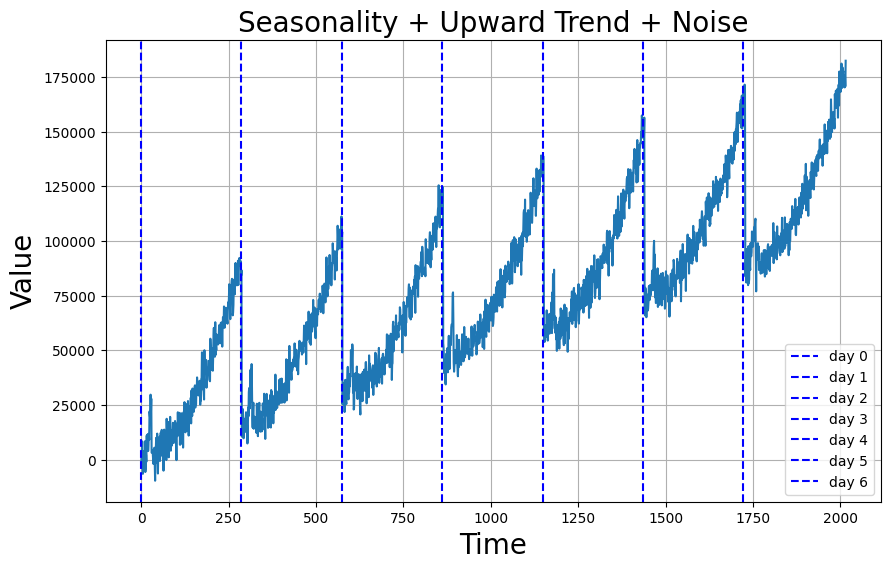

In [66]:
seasonal_upward = seasonal + np.arange(int(day*7))*50

time_seasonal = np.arange(int(day*7))
plot_time_series(time_seasonal, seasonal_upward, label="Seasonality + Upward Trend + Noise")

## White Noise


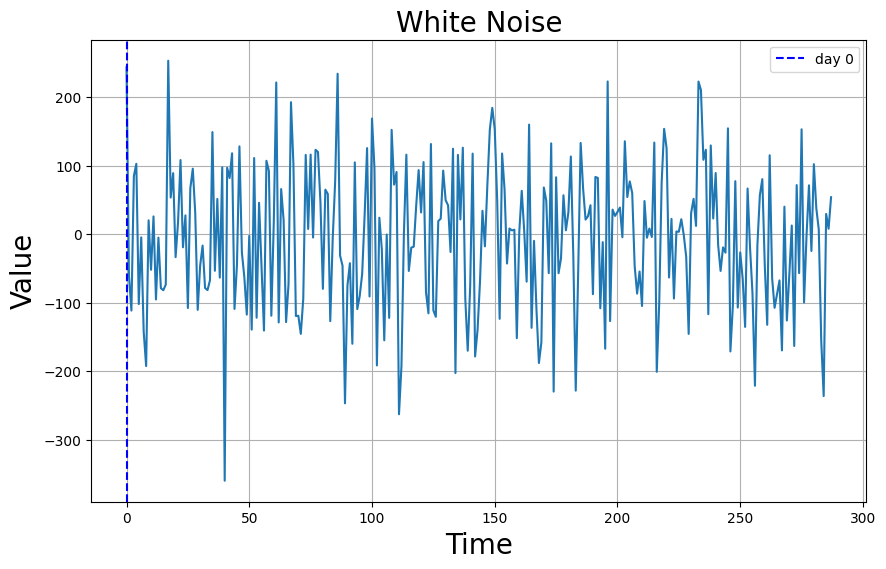

In [68]:
time = np.arange(day)
values = np.random.randn(int(day))*100

plot_time_series(time, values, label="White Noise")

## Non-stationary Time Series

Size: 2016


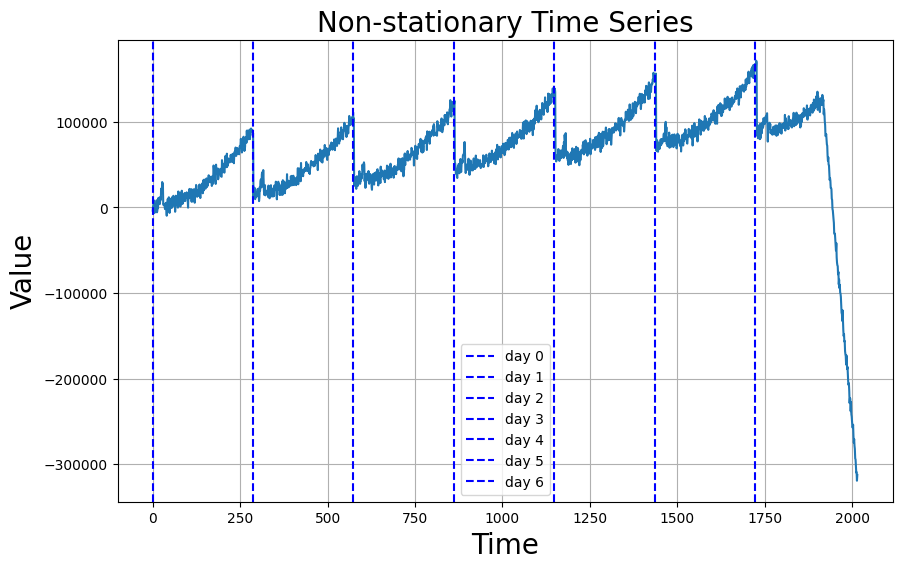

In [85]:
big_event = np.zeros(int(day)*7)
#big_event[-100:] = np.arange(100)*-500
big_event[-100:] = np.arange(100)*-5000

print(f"Size: {len(big_event)}")

non_stationary = seasonal_upward + big_event

time_seasonal = np.arange(day*7)
plot_time_series(time_seasonal, non_stationary, label="Non-stationary Time Series")

## Try cosine wave form

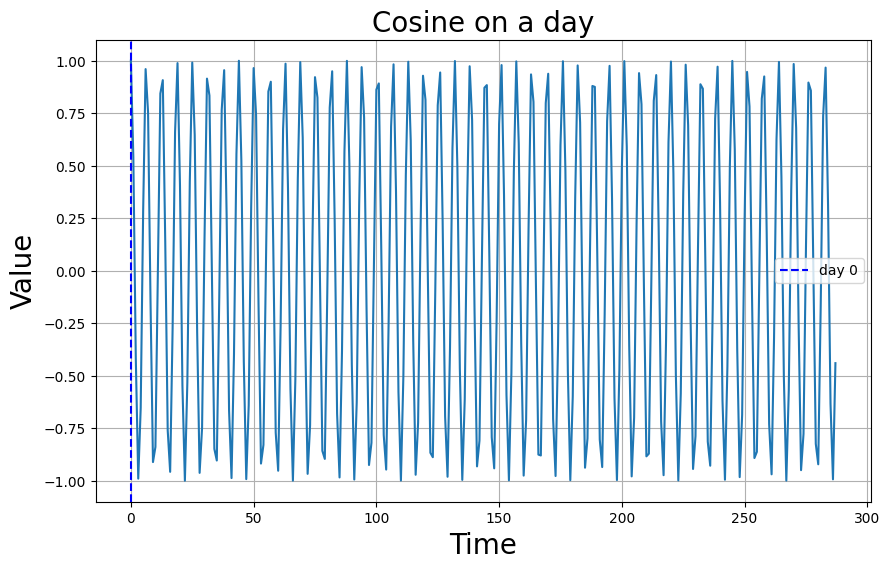

In [7]:
time = np.arange(0, day)
amplitude = np.cos(time)

plot_time_series(time, amplitude, label="Cosine on a day")

# Synthetic data

Following the traffic graphs found on internet

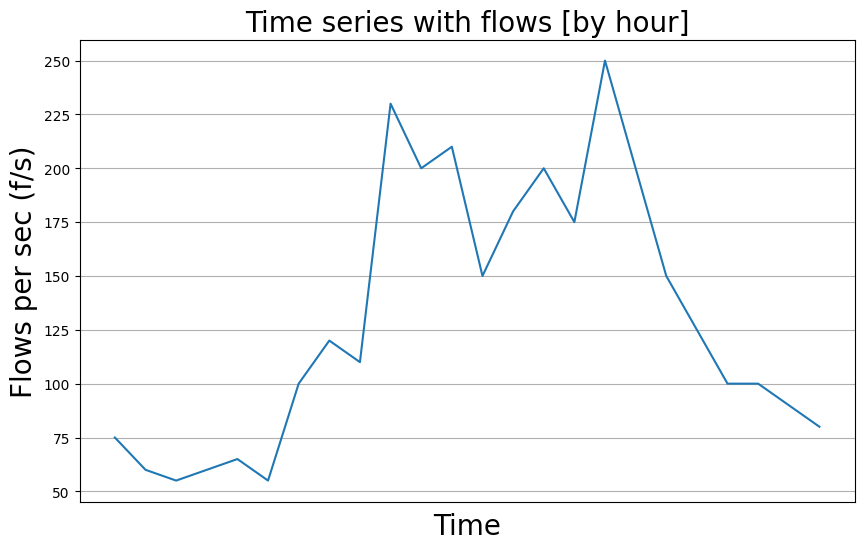

In [18]:
df = pd.read_csv('./data_test/flow_day_hour.csv')

plot_time_series(df['time'], df['flow'], label="Time series with flows [by hour]", only_day=False)

In [59]:
## Generate 11 samples to continue a timeseries
number_1 = 82
number_2 = 75

alpha = 0.95
values = [int(number_1*alpha), int(number_2*alpha)]
print(f"Values random: {values[0]} and {values[1]}")
np.random.randint(low=min(values), high=max(values), size=11)   

Values random: 77 and 71


array([74, 76, 76, 72, 74, 76, 72, 76, 72, 72, 71])

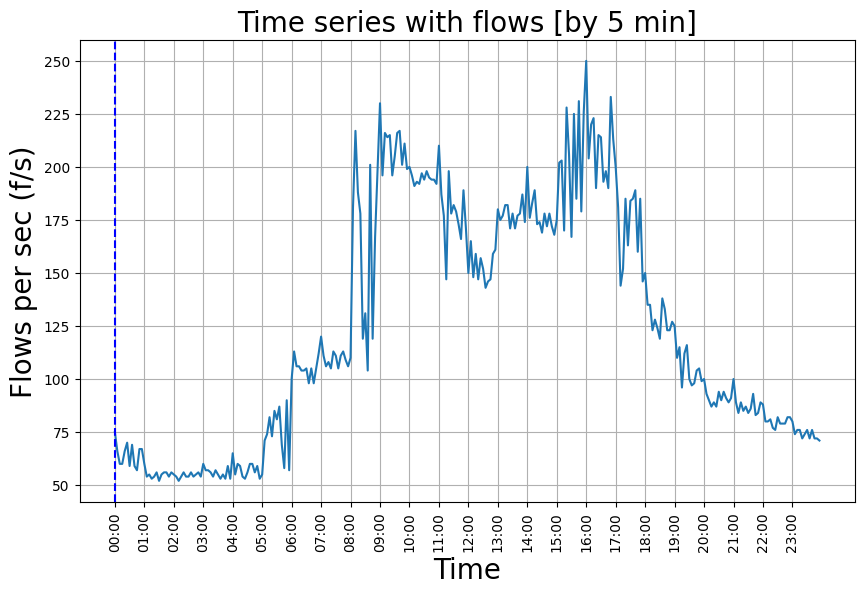

In [19]:
df = pd.read_csv('./data_test/flow_day_5min.csv')

flows_5min_value = df['flow'].to_numpy()
flows_5min_time = df['time'].to_numpy()

plot_time_series(flows_5min_time, flows_5min_value, label="Time series with flows [by 5 min]", only_day=True)

## Generate a week

In [94]:
def generate_week(values_5min, beta_weekend, alpha_season=1.0):
    # Week start on Sunday

    seasonal = []
    for i in range(7):
        for j in range(int(day)):
            if i==0 or i==1 or i == 7:
                seasonal.append((values_5min[j] * alpha_season)* beta_weekend)
            else:
                seasonal.append((values_5min[j] * alpha_season))

    # Best performance outside
    #seasonal = seasonal + np.arange(int(day*7))*trend
    return seasonal

In [70]:
def apply_trend(values, cagr, years=1):
    # Apply CAGR exponential upward
    seasonal = []
    #seasonal = values ** (np.power((1+cagr), years))
    #seasonal = values **(np.power((1+cagr), years))
    seasonal = values + np.arange(len(values))**cagr

    return seasonal

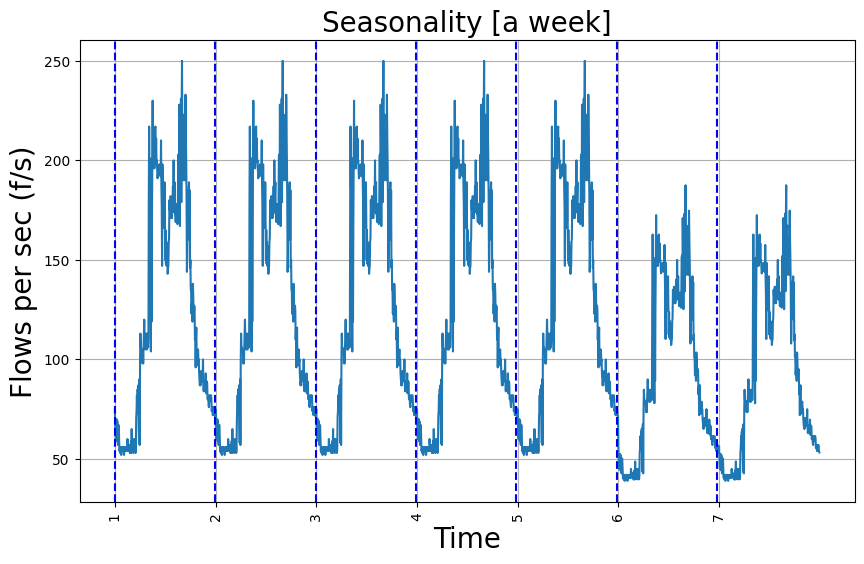

In [89]:
# factor for reduce traffic on weekend
beta = 0.75

values_week = generate_week(flows_5min_value, beta_weekend=beta)
        
# Plot
time_week = np.arange(day*7)
plot_time_series(time_week, values_week, label="Seasonality [a week]")

## Add Upward trend to a week

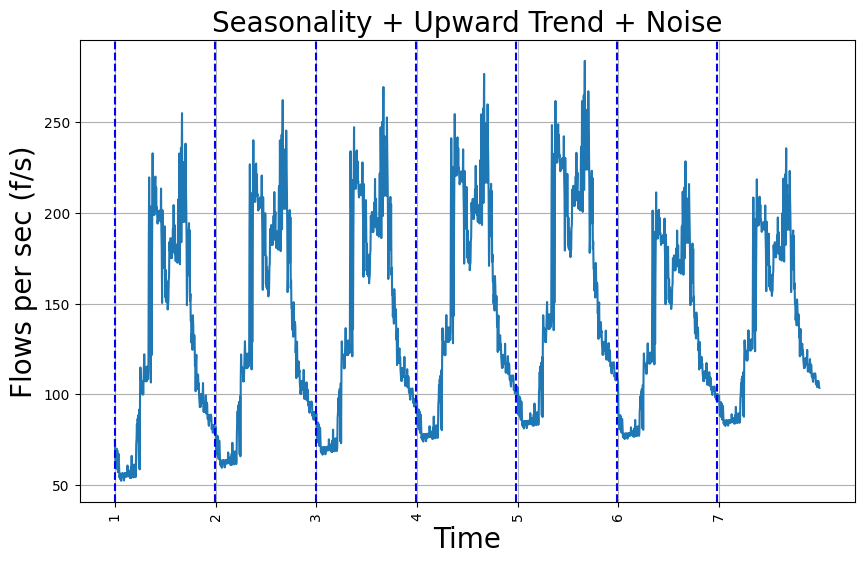

In [91]:
seasonal_week= values_week + np.arange(int(day*7))*0.025

time_week = np.arange(int(day*7))
plot_time_series(time_week, seasonal_week, label="Seasonality + Upward Trend + Noise")

## Add noise to a time series

In [21]:
def apply_noise(values, noise):
    noise = np.random.randn(len(values))*noise
    values += noise
    return values

## Generate a month, with upward trend

In [22]:
# Upward trend
CAGR = 0.30

# White Noise
noise = 10

# Weekend effect
weekend=0.85

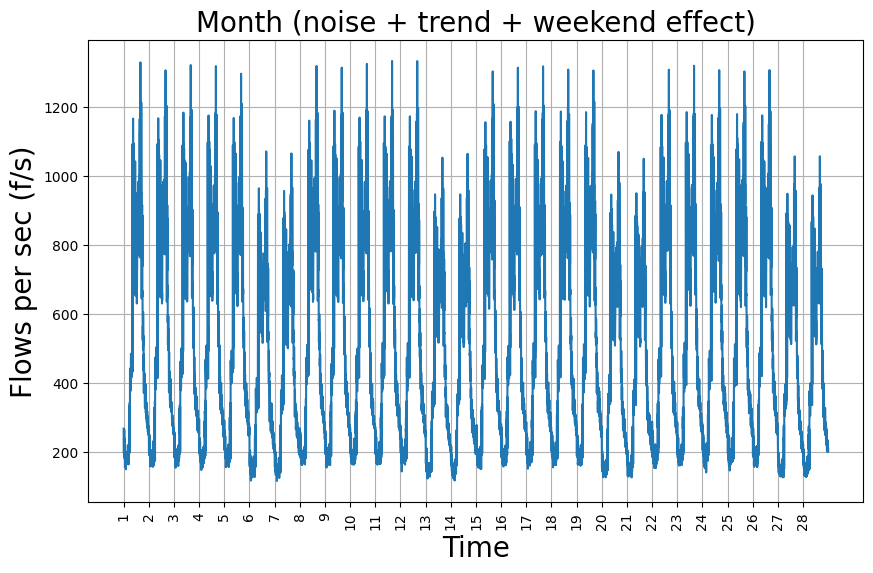

In [30]:
# Weeks in a year, init 01-01
weeks = 4

values_month = []
for week in range(weeks):
    values_month.append(generate_week(flows_5min_value, beta_weekend=weekend))

values_month = np.concatenate(values_month)  
values_month = apply_trend(values_month, cagr=CAGR)
values_month = apply_noise(values_month, noise=noise)

time_month = np.arange(int(day*7*weeks))
plot_time_series(time_month, values_month, label="Month (noise + trend + weekend effect)", mark_days=False)

## Generate a year, with season and upward trend

In [50]:
# Weeks in a year, init 01-01
weeks = 52

values_year = []
for week in range(weeks):
    # 0 to 12 winter
    # 12 to 24 spring
    # 24 to 36 summer
    # 36 to 48 autum
    if week >=24 and week <= 34:    # Its summer
        values_year.append(generate_week(flows_5min_value, beta_weekend=beta, alpha_season=1.2))
    else:
        values_year.append(generate_week(flows_5min_value, beta_weekend=beta))

values_year = np.concatenate(values_year)  
values_year = apply_trend(values_year, trend=0.35)
values_year = apply_noise(values_year, noise=noise)

time_year = np.arange(int(day*7*weeks))
plot_time_series(time_year, values_year, label="Year (noise + trend + weekend effect + summer season)", mark_days=False, hide_xticks=True)

NameError: name 'beta' is not defined

## Percentile 95 for plot yearly

In [34]:
def apply_95percentile(values):
    days = len(values) / ((60/5)*24)
    seasonal = []
    for d in range(int(days)):
        values_day = values[0+(d*288):288+(d*288)]
        seasonal.append(np.percentile(values_day, 95))

    return seasonal

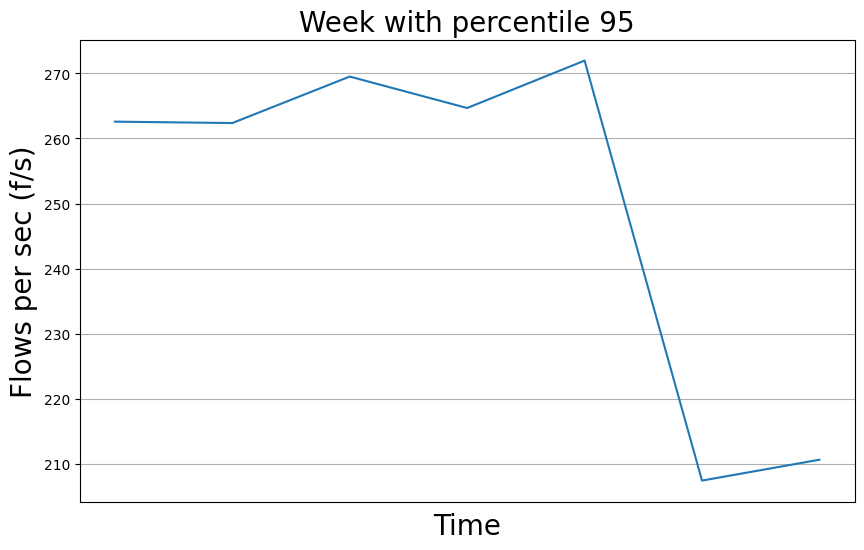

In [95]:
values_week_per95 = generate_week(flows_5min_value, beta_weekend=beta, alpha_season=1.2)
values_week_per95 = apply_trend(values_week_per95, trend=0.35)
values_week_per95 = apply_noise(values_week_per95, noise=noise)

values_week_per95 = apply_95percentile(values=values_week_per95)

time_week_per95 = np.arange(len(values_week_per95))
plot_time_series(time_week_per95, values_week_per95, label="Week with percentile 95")

Days: 1092


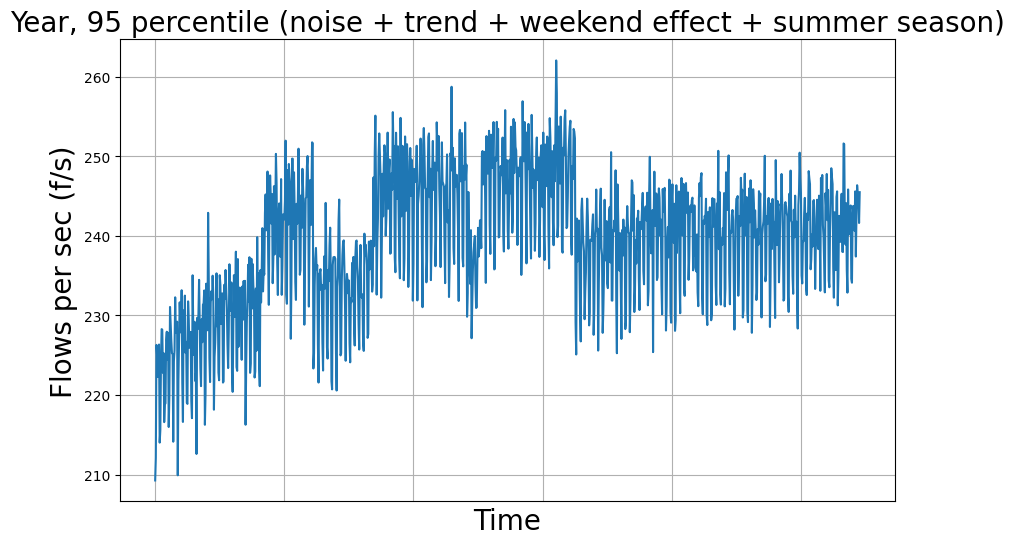

In [104]:
# Vars
weekend = 0.95
season = 1.05
trend_cagr = 0.26
noise = 15

# Weeks in a year, init 01-01, end at 30-12
weeks = 156     # Three years == 156

values_year_per95 = []
for week in range(weeks):
    # 0 to 12 winter
    # 12 to 24 spring
    # 24 to 36 summer
    # 36 to 48 autum
    if week >= 24 and week <= 34:       # Its summer
        values_year_per95.append(generate_week(flows_5min_value, beta_weekend=weekend, alpha_season=season))
    elif week >= 48 and week <= 68:    # Its summer
        values_year_per95.append(generate_week(flows_5min_value, beta_weekend=weekend, alpha_season=season))
    elif week >= 72 and week <= 92:    # Its summer
        values_year_per95.append(generate_week(flows_5min_value, beta_weekend=weekend, alpha_season=season))
    else:
        values_year_per95.append(generate_week(flows_5min_value, beta_weekend=weekend))

values_year_per95 = np.concatenate(values_year_per95)  
values_year_per95 = apply_noise(values_year_per95, noise=noise)
values_year_per95 = apply_trend(values_year_per95, cagr=trend_cagr, years=1)
values_year_per95 = apply_95percentile(values=values_year_per95)

print(f"Days: {len(values_year_per95)}")

#time_seasonal = np.arange(int(day*7*weeks))
time_year_per95 = np.arange(len(values_year_per95))
plot_time_series(time_year_per95, values_year_per95, label="Year, 95 percentile (noise + trend + weekend effect + summer season)", mark_days=False, hide_xticks=True)

## Save Time Series to dataframe and CSV

In [18]:
import pandas as pd

In [103]:
# Percentile 95, just 364 entries
values = np.array(values_year_per95)
dataframe_data = np.array([time_year_per95, values]).T
df_year_per95 = pd.DataFrame(dataframe_data, columns=['time', 'flow'])
df_year_per95.time = pd.to_datetime(df_year_per95.time, unit='D')
df_year_per95['time']  = (df_year_per95['time'] + pd.DateOffset(years=52)).dt.strftime('%Y-%m-%dT%H:%M:%SZ')

# Round flow 
df_year_per95['flow'] = df_year_per95['flow'].round()

df_year_per95.head()

filename = './data_test/output_synthetic_dataset_per95.csv'

df_year_per95.to_csv(filename, index=False)

In [114]:
# Slots each 5 min
data = np.array(values_year)
dataframe_data = np.array([time_year*300, data]).T
df_year = pd.DataFrame(dataframe_data, columns=['time', 'flow'])
df_year.time = pd.to_datetime(df_year.time, unit='s')
df_year['time']  = (df_year['time'] + pd.DateOffset(years=52)).dt.strftime('%Y-%m-%dT%H:%M:%SZ')

# Round flow 
df_year['flow'] = df_year['flow'].round()

print(f"{df_year.head()}")

print(f"{df_year.tail()}")

                   time  flow
0  2022-01-01T00:00:00Z  84.0
1  2022-01-01T00:05:00Z  64.0
2  2022-01-01T00:10:00Z  56.0
3  2022-01-01T00:15:00Z  58.0
4  2022-01-01T00:20:00Z  66.0
                        time   flow
104827  2022-12-30T23:35:00Z  110.0
104828  2022-12-30T23:40:00Z  107.0
104829  2022-12-30T23:45:00Z  109.0
104830  2022-12-30T23:50:00Z   99.0
104831  2022-12-30T23:55:00Z  109.0


In [111]:
filename = './data_test/output_synthetic_dataset.csv'

df_year.to_csv(filename, index=False)